In [16]:
import numpy as np
import matplotlib.pyplot as plt
import re
import ast

In [33]:
def visualize_tour(title, cities, tour, savefig=True) -> None:
    """
    Visualizes the TSP tour.

    Parameters:
    - cities: A list of tuples representing the (x, y) coordinates of each city.
    - tour: A list of indices representing the order in which to visit the cities.
    """
    tour_cities = [cities[i] for i in tour] + [cities[tour[0]]]
    x, y = zip(*tour_cities)

    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(x, y, "r.")
    plt.plot(x, y, linestyle="--", color="blue")

    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid()
    if savefig:
        plt.savefig(f"./{title}.png", dpi=300)
    plt.show()


def parse_string_to_components(input_string):
    pattern = r"^(\d+)\s+(\d+)\s+(.+)$"

    match = re.match(pattern, input_string.strip())
    if not match:
        raise ValueError(f"Некорректный формат строки: {input_string}")

    first_num = int(match.group(1))
    second_num = int(match.group(2))
    list_str = match.group(3)

    # Безопасно преобразуем строку списка в реальный список
    try:
        numbers_list = ast.literal_eval(list_str)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Некорректный формат списка: {list_str}") from e

    return first_num, second_num, numbers_list

In [34]:
names = [
    "../data/tsp_51_1",
    "../data/tsp_100_3",
    "../data/tsp_200_2",
    "../data/tsp_574_1",
    "../data/tsp_1889_1",
    "../data/tsp_33810_1",
]

FileNotFoundError: [Errno 2] No such file or directory: './test0/score7.png'

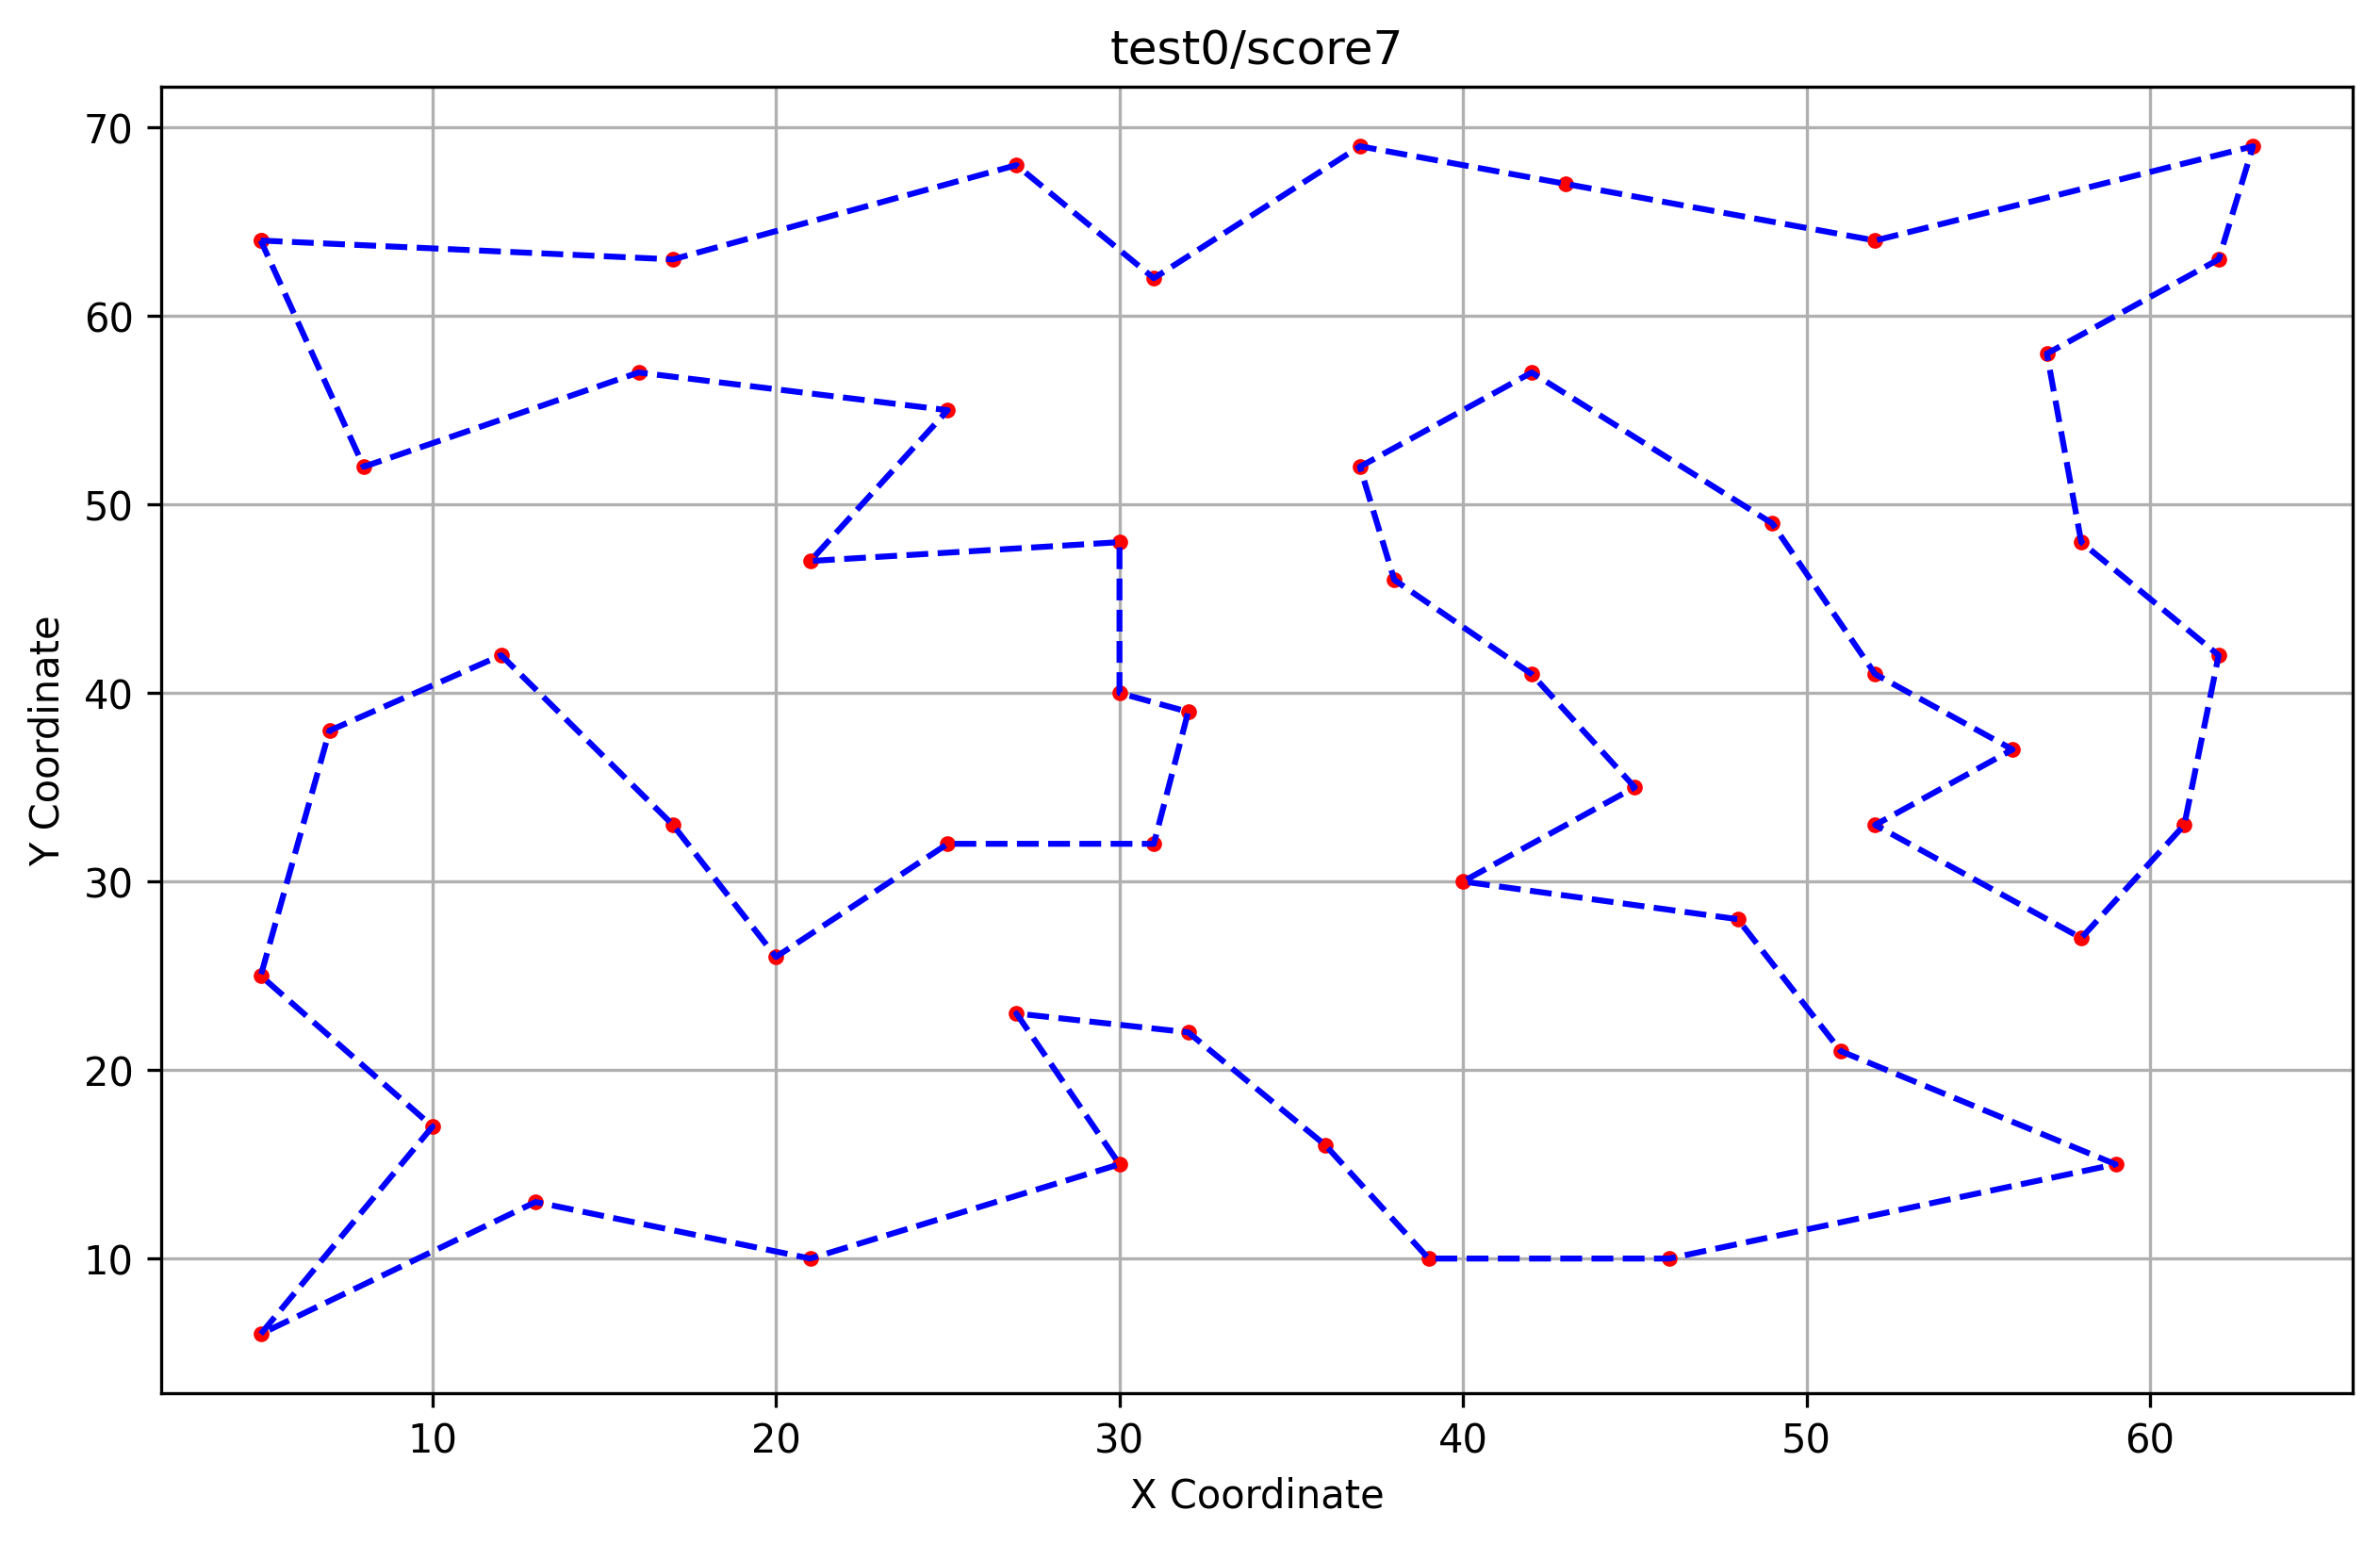

In [ ]:
with open("../answer.txt", "r") as file:
    lines = file.readlines()

    for i in range(len(lines)):
        first, second, lst = parse_string_to_components(lines[i])

        cities = np.genfromtxt(names[i], skip_header=1)

        visualize_tour(f"test{first}-score{second}", cities, lst)